In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [7]:
#Phase 1
#Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/dataset.csv")

In [8]:
df

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...,...
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23


In [9]:
# 1. Data Cleaning & Consistency
df_clean = df.drop(columns=['Unnamed: 0', 'timestamp'])
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean = df_clean.sort_values(by=['crypto_name', 'date']).reset_index(drop=True)

In [10]:
df_clean

,open,high,low,close,volume,marketCap,crypto_name,date
0,0.000000,0.516571,0.000000,0.516571,0.000000e+00,0.000000e+00,Aave,2020-10-02
1,0.523836,65.305938,0.523801,53.151488,0.000000e+00,0.000000e+00,Aave,2020-10-03
2,53.179858,55.070355,50.688990,52.675035,0.000000e+00,0.000000e+00,Aave,2020-10-04
3,52.675035,55.112358,49.787900,53.219243,0.000000e+00,8.912813e+07,Aave,2020-10-05
4,53.291969,53.402270,40.734578,42.401599,5.830915e+05,7.101144e+07,Aave,2020-10-06
...,...,...,...,...,...,...,...,...
72941,0.488732,0.518314,0.478734,0.492627,3.422192e+09,2.455686e+10,XRP,2022-09-25
72942,0.475119,0.477434,0.448158,0.448850,1.524149e+09,2.239791e+10,XRP,2022-10-02
72943,0.517149,0.541416,0.508167,0.534061,1.789207e+09,2.662750e+10,XRP,2022-10-09
72944,0.481530,0.487103,0.471813,0.477010,1.028960e+09,2.383341e+10,XRP,2022-10-16


In [11]:
# Handle potential missing values (zeros in volume/marketCap)
cols_to_check = ['volume', 'marketCap']
df_clean[cols_to_check] = df_clean[cols_to_check].replace(0, np.nan)
df_clean[cols_to_check] = df_clean.groupby('crypto_name')[cols_to_check].transform(lambda x: x.ffill().bfill())

In [13]:
df_clean

,open,high,low,close,volume,marketCap,crypto_name,date
0,0.000000,0.516571,0.000000,0.516571,5.830915e+05,8.912813e+07,Aave,2020-10-02
1,0.523836,65.305938,0.523801,53.151488,5.830915e+05,8.912813e+07,Aave,2020-10-03
2,53.179858,55.070355,50.688990,52.675035,5.830915e+05,8.912813e+07,Aave,2020-10-04
3,52.675035,55.112358,49.787900,53.219243,5.830915e+05,8.912813e+07,Aave,2020-10-05
4,53.291969,53.402270,40.734578,42.401599,5.830915e+05,7.101144e+07,Aave,2020-10-06
...,...,...,...,...,...,...,...,...
72941,0.488732,0.518314,0.478734,0.492627,3.422192e+09,2.455686e+10,XRP,2022-09-25
72942,0.475119,0.477434,0.448158,0.448850,1.524149e+09,2.239791e+10,XRP,2022-10-02
72943,0.517149,0.541416,0.508167,0.534061,1.789207e+09,2.662750e+10,XRP,2022-10-09
72944,0.481530,0.487103,0.471813,0.477010,1.028960e+09,2.383341e+10,XRP,2022-10-16


In [21]:
# Phase 2 : Feature Engineering
def engineer_features(group):
    # Daily Returns
    group['daily_return'] = group['close'].pct_change()

    # Target: Rolling Volatility (14-day std dev of returns)
    group['rolling_volatility'] = group['daily_return'].rolling(window=14).std()

    # Liquidity Ratio
    group['liquidity_ratio'] = group['volume'] / group['marketCap']

    # ATR (Average True Range)
    high_low = group['high'] - group['low']
    high_close = np.abs(group['high'] - group['close'].shift())
    low_close = np.abs(group['low'] - group['close'].shift())
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    group['atr'] = tr.rolling(window=14).mean()

    # Bollinger Bands
    sma = group['close'].rolling(window=20).mean()
    std = group['close'].rolling(window=20).std()
    group['bb_upper'] = sma + (2 * std)
    group['bb_lower'] = sma - (2 * std)

    return group



In [22]:
df_engineered = df_clean.groupby('crypto_name').apply(engineer_features).reset_index(drop=True)
df_engineered = df_engineered.dropna() # Drop NaN from rolling windows
df_engineered

,open,high,low,close,volume,marketCap,crypto_name,date,daily_return,rolling_volatility,liquidity_ratio,atr,bb_upper,bb_lower
19,32.253490,37.078203,32.048149,35.160357,4.383123e+07,3.249973e+08,Aave,2020-10-21,0.092615,0.080929,0.134866,5.399349,66.505976,19.002601
20,35.097487,39.856921,33.589463,38.031651,5.471737e+07,4.023963e+08,Aave,2020-10-22,0.081663,0.080024,0.135979,5.260850,57.988164,31.271922
21,37.730594,42.546656,36.924671,41.686637,7.608186e+07,4.452571e+08,Aave,2020-10-23,0.096104,0.082243,0.170872,5.356866,56.847122,31.266478
22,41.686637,42.439706,38.728822,39.455022,5.765817e+07,4.214211e+08,Aave,2020-10-24,-0.053533,0.081599,0.136818,5.286049,55.666668,31.124931
23,39.455022,40.928509,37.601201,37.904761,4.397045e+07,4.048626e+08,Aave,2020-10-25,-0.039292,0.081604,0.108606,5.328190,54.211843,31.048308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72941,0.488732,0.518314,0.478734,0.492627,3.422192e+09,2.455686e+10,XRP,2022-09-25,0.272698,0.083176,0.139358,0.028808,0.436159,0.292934
72942,0.475119,0.477434,0.448158,0.448850,1.524149e+09,2.239791e+10,XRP,2022-10-02,-0.088865,0.088415,0.068049,0.031121,0.449625,0.287736
72943,0.517149,0.541416,0.508167,0.534061,1.789207e+09,2.662750e+10,XRP,2022-10-09,0.189842,0.099543,0.067194,0.036658,0.486827,0.268014
72944,0.481530,0.487103,0.471813,0.477010,1.028960e+09,2.383341e+10,XRP,2022-10-16,-0.106824,0.105841,0.043173,0.039903,0.500654,0.268156


In [23]:
# 3. Normalization
numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'marketCap',
                'rolling_volatility', 'liquidity_ratio', 'atr', 'bb_upper', 'bb_lower']

scaler = MinMaxScaler()
df_engineered[numeric_cols] = scaler.fit_transform(df_engineered[numeric_cols])



In [24]:
df_engineered

,open,high,low,close,volume,marketCap,crypto_name,date,daily_return,rolling_volatility,liquidity_ratio,atr,bb_upper,bb_lower
19,0.000477,0.000229,0.000482,0.000520,0.000125,0.000255,Aave,2020-10-21,0.092615,0.001707,0.006302,0.000460,0.000960,0.001188
20,0.000520,0.000246,0.000505,0.000563,0.000156,0.000315,Aave,2020-10-22,0.081663,0.001688,0.006354,0.000448,0.000837,0.001396
21,0.000559,0.000262,0.000556,0.000617,0.000217,0.000349,Aave,2020-10-23,0.096104,0.001735,0.007984,0.000456,0.000820,0.001396
22,0.000617,0.000262,0.000583,0.000584,0.000164,0.000330,Aave,2020-10-24,-0.053533,0.001721,0.006393,0.000450,0.000803,0.001394
23,0.000584,0.000252,0.000566,0.000561,0.000125,0.000317,Aave,2020-10-25,-0.039292,0.001722,0.005075,0.000454,0.000782,0.001393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72941,0.000007,0.000003,0.000007,0.000007,0.009751,0.019263,XRP,2022-09-25,0.272698,0.001755,0.006512,0.000002,0.000006,0.000870
72942,0.000007,0.000003,0.000007,0.000007,0.004343,0.017569,XRP,2022-10-02,-0.088865,0.001865,0.003180,0.000003,0.000006,0.000870
72943,0.000008,0.000003,0.000008,0.000008,0.005098,0.020887,XRP,2022-10-09,0.189842,0.002100,0.003140,0.000003,0.000007,0.000869
72944,0.000007,0.000003,0.000007,0.000007,0.002932,0.018695,XRP,2022-10-16,-0.106824,0.002233,0.002017,0.000003,0.000007,0.000869


In [25]:
# Save output
df_engineered.to_csv('processed_cryptocurrency_data.csv', index=False)

In [26]:
#Phase 3 : EXPLORATORY DATA ANALYSIS

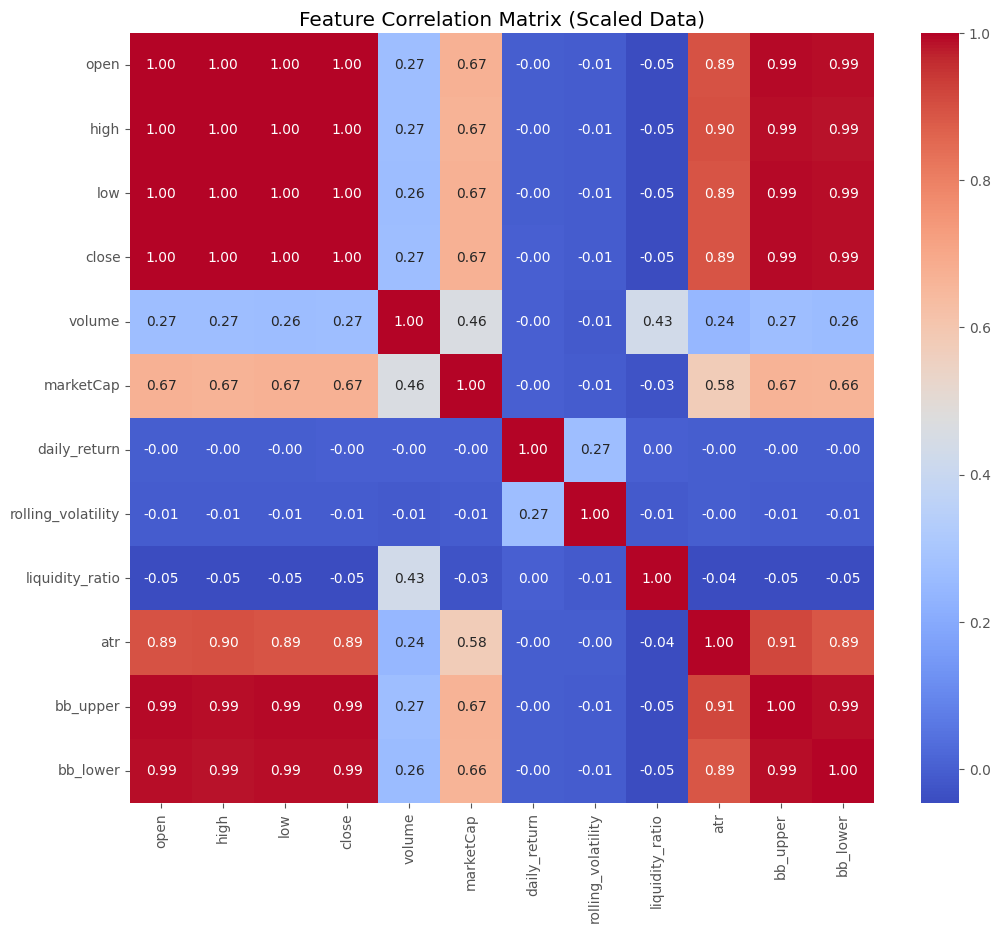

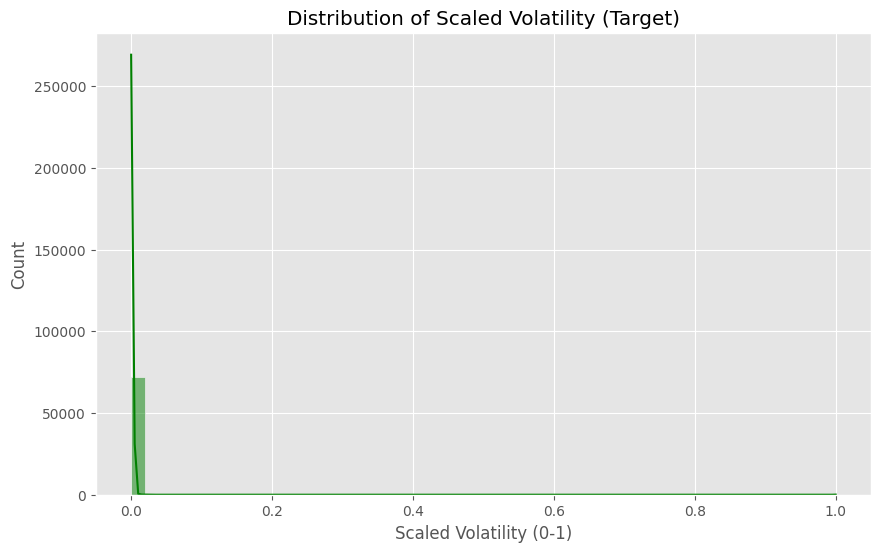

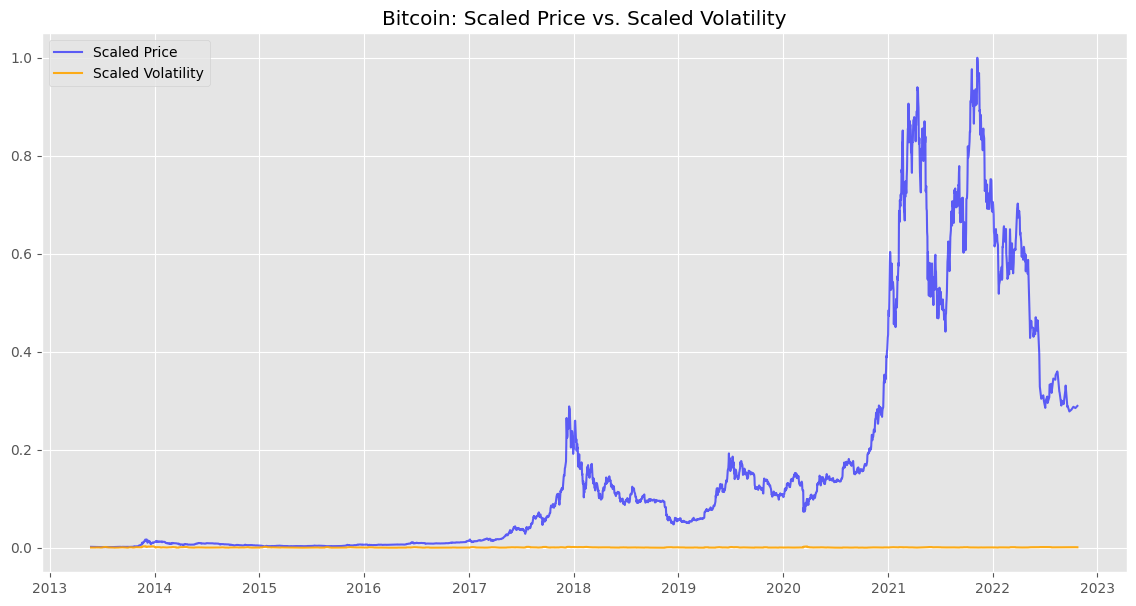

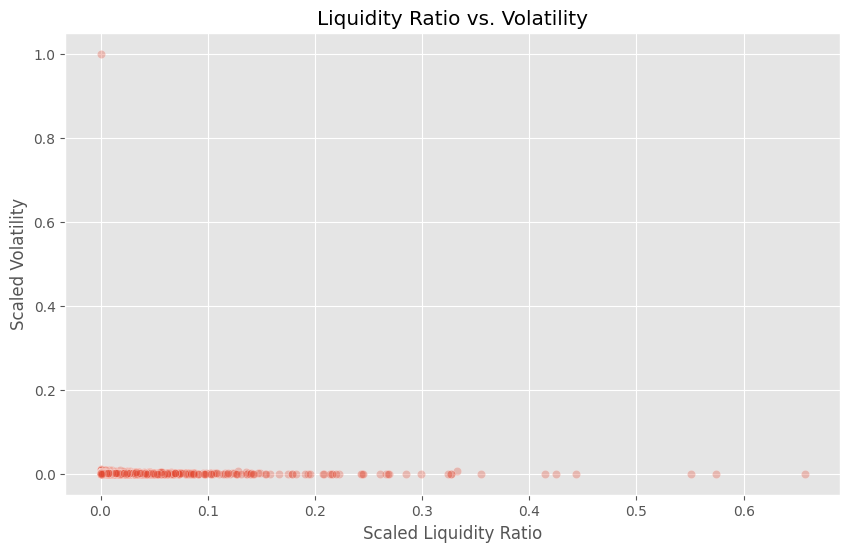

In [27]:
# 1. Load the Processed Data
df = pd.read_csv('processed_cryptocurrency_data.csv')

# Set plotting style
plt.style.use('ggplot')

# --- Plot 1: Correlation Heatmap ---
plt.figure(figsize=(12, 10))
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix (Scaled Data)')
plt.show()

# --- Plot 2: Scaled Volatility Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df['rolling_volatility'], bins=50, kde=True, color='green')
plt.title('Distribution of Scaled Volatility (Target)')
plt.xlabel('Scaled Volatility (0-1)')
plt.show()

# --- Plot 3: Price vs Volatility Overlay ---
# We filter for Bitcoin to get a clear single-asset view
# (Ensure 'Bitcoin' exists in your processed data 'crypto_name' column)
subset = df[df['crypto_name'] == 'Bitcoin'].sort_values(by='date')

plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(subset['date']), subset['close'], label='Scaled Price', color='blue', alpha=0.6)
plt.plot(pd.to_datetime(subset['date']), subset['rolling_volatility'], label='Scaled Volatility', color='orange', alpha=0.9)
plt.title('Bitcoin: Scaled Price vs. Scaled Volatility')
plt.legend()
plt.show()

# --- Plot 4: Liquidity vs Volatility ---
plt.figure(figsize=(10, 6))
# Sample 5000 points to avoid overplotting if dataset is large
sns.scatterplot(data=df.sample(5000, random_state=42),
                x='liquidity_ratio', y='rolling_volatility', alpha=0.3)
plt.title('Liquidity Ratio vs. Volatility')
plt.xlabel('Scaled Liquidity Ratio')
plt.ylabel('Scaled Volatility')
plt.show()

In [ ]:
# Phase 4 : Model building and Training

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

Loading data...
Training on 57520 samples, Testing on 14380 samples.
Training models...

--- Linear Regression Performance ---
RMSE: 0.0010
MAE:  0.0007
R²:   -0.1016

--- Random Forest Performance ---
RMSE: 0.0014
MAE:  0.0003
R²:   -1.0986

Model saved to 'volatility_model.pkl'


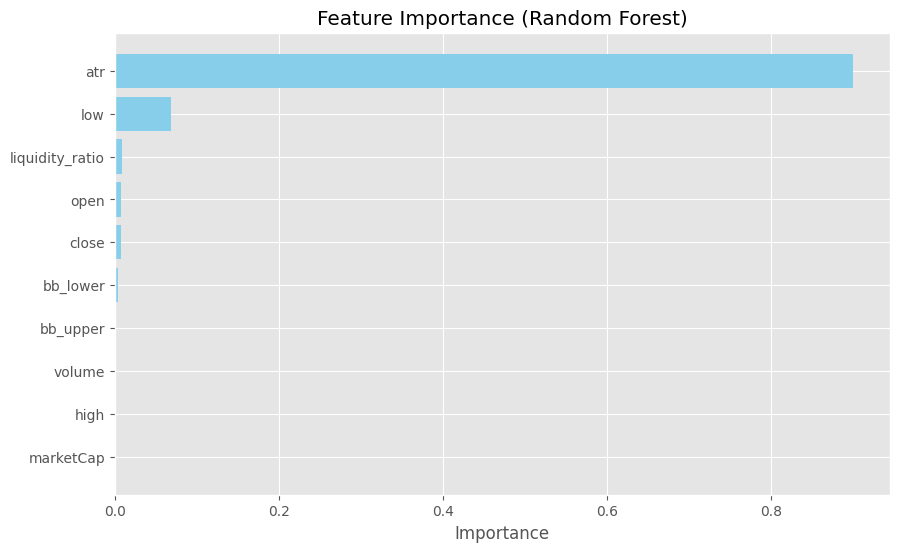

In [29]:
# 1. Load the Processed Data
print("Loading data...")
df = pd.read_csv('processed_cryptocurrency_data.csv')

# Ensure data is sorted by date for time-series splitting
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['date', 'crypto_name'])

# 2. Feature Selection
# We drop non-numeric identifiers and the target variable itself
target = 'rolling_volatility'
ignore_cols = ['date', 'crypto_name', target, 'daily_return']
features = [col for col in df.columns if col not in ignore_cols]

X = df[features]
y = df[target]

# 3. Time-Series Train-Test Split (80/20 split)
# We do NOT shuffle because future data shouldn't leak into the past
split_index = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"Training on {len(X_train)} samples, Testing on {len(X_test)} samples.")

# 4. Model Training
print("Training models...")

# Model A: Linear Regression (Baseline)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Model B: Random Forest (Advanced)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# 5. Evaluation Function
def print_metrics(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {model_name} Performance ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R²:   {r2:.4f}")

print_metrics("Linear Regression", y_test, lr_preds)
print_metrics("Random Forest", y_test, rf_preds)

# 6. Save the Best Model
# We'll save Random Forest as it's generally more robust for deployment
joblib.dump(rf_model, 'volatility_model.pkl')
print("\nModel saved to 'volatility_model.pkl'")

# 7. Feature Importance Plot
importances = rf_model.feature_importances_
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.show()

In [30]:
# Hyper parameter tuning

In [34]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# 1. Load Data
print("Loading data...")
df = pd.read_csv('processed_cryptocurrency_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['date', 'crypto_name'])

# 2. Setup Features
target = 'rolling_volatility'
ignore_cols = ['date', 'crypto_name', target, 'daily_return']
features = [col for col in df.columns if col not in ignore_cols]

X = df[features]
y = df[target]

# 3. SPLIT DATA
# We use the standard split logic
split_idx = int(len(df) * 0.8)
X_train_full = X.iloc[:split_idx]
y_train_full = y.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_test = y.iloc[split_idx:]

# --- SPEED OPTIMIZATION HERE ---
# Instead of tuning on 50,000+ rows, we tune on the last 10,000 rows of training data.
# This gives the model enough recent context to find good parameters without wasting time.
tune_size = 10000
if len(X_train_full) > tune_size:
    print(f"Subsampling last {tune_size} rows for faster tuning...")
    X_tune = X_train_full.iloc[-tune_size:]
    y_tune = y_train_full.iloc[-tune_size:]
else:
    X_tune = X_train_full
    y_tune = y_train_full

# 4. Randomized Search (Faster than Grid Search)
param_dist = {
    'n_estimators': [50, 100, 150],       # Limit max trees
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']      # Test different feature selection methods
}

tscv = TimeSeriesSplit(n_splits=3)

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,                            # LIMIT: Only try 10 random combinations
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Starting Randomized Search (Fast Mode)...")
random_search.fit(X_tune, y_tune)

print(f"\nBest Parameters Found: {random_search.best_params_}")

# 5. Final Training
# Now that we found the best params quickly, we train ONE final model on the FULL training set
print("Training final model with best parameters on full history...")
best_model = random_search.best_estimator_
best_model.fit(X_train_full, y_train_full)

# 6. Evaluate
preds = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(f"Final Optimized RMSE: {rmse:.4f}")
print(f"Final Optimized R²: {r2:.4f}")

# Save
joblib.dump(best_model, 'optimized_volatility_model.pkl')
print("Model saved!")

Loading data...
Subsampling last 10000 rows for faster tuning...
Starting Randomized Search (Fast Mode)...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters Found: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20}
Training final model with best parameters on full history...
Final Optimized RMSE: 0.0019
Final Optimized R²: -2.9920
Model saved!
